# Оганов Алексей МИВТ-24-3-1 Sorting

**Задание 1.**

Измените функцию bubble_sort в пузырьковая сортировка, что бы она принимала еще один элемент (вариант сортировки). Например reverse.

In [7]:
def bubble_sort(nums, reverse=False):
    # Устанавливаю swapped в True, чтобы цикл запустился хотя бы один раз
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(nums) - 1):
            # Для сортировки по возрастанию
            if (not reverse and nums[i] > nums[i + 1]) or (reverse and nums[i] < nums[i + 1]):
                # Меняю элементы местами
                nums[i], nums[i + 1] = nums[i + 1], nums[i]
                # Устанавливаю swapped в True для следующей итерации
                swapped = True

nums = [5, 3, 8, 1, 2]
bubble_sort(nums)
print(nums)

bubble_sort(nums, reverse=True)
print(nums)


[1, 2, 3, 5, 8]
[8, 5, 3, 2, 1]


**Задание 2.**

Измените функцию selection_sort в сортировка выборкой, что бы она принимала еще один элемент (вариант сортировки). Например reverse.

In [6]:
def selection_sort(nums, reverse=False):
    # Значение i соответствует количеству отсортированных элементов
    for i in range(len(nums)):
        # Изначально считаю наименьшим (или наибольшим) первый элемент
        target_index = i

        # Этот цикл перебирает несортированные элементы
        for j in range(i + 1, len(nums)):
            # Для сортировки по возрастанию (если reverse=False)
            if (not reverse and nums[j] < nums[target_index]) or (reverse and nums[j] > nums[target_index]):
                target_index = j

        # Меняю текущий элемент с найденным минимальным (или максимальным)
        nums[i], nums[target_index] = nums[target_index], nums[i]

nums = [5, 3, 8, 1, 2]

# Сортировка по возрастанию
selection_sort(nums)
print(nums)

# Сортировка по убыванию
selection_sort(nums, reverse=True)
print(nums)


[1, 2, 3, 5, 8]
[8, 5, 3, 2, 1]


**Задание 3**

    Замерьте время выполнения всех разобранных сегодня сортировок и выведите время самой быстрой из них. Придумайте как это сделать!

    с 10 элементами
    со 100 элементами
    с 1000 элементами
    И на основе этих данных постройте график.


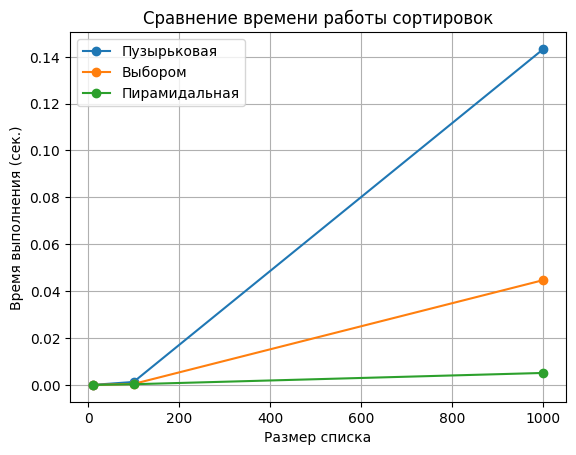

In [8]:
import time
import random
import matplotlib.pyplot as plt

def bubble_sort(nums):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(nums) - 1):
            if nums[i] > nums[i + 1]:
                nums[i], nums[i + 1] = nums[i + 1], nums[i]
                swapped = True

def selection_sort(nums):
    for i in range(len(nums)):
        lowest_value_index = i
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]

def heapify(nums, heap_size, root_index):
    largest = root_index
    left_child = (2 * root_index) + 1
    right_child = (2 * root_index) + 2
    if left_child < heap_size and nums[left_child] > nums[largest]:
        largest = left_child
    if right_child < heap_size and nums[right_child] > nums[largest]:
        largest = right_child
    if largest != root_index:
        nums[root_index], nums[largest] = nums[largest], nums[root_index]
        heapify(nums, heap_size, largest)

def heap_sort(nums):
    n = len(nums)
    for i in range(n, -1, -1):
        heapify(nums, n, i)
    for i in range(n - 1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0)

# Функция для замера времени сортировки
def measure_sort_time(sort_function, nums):
    start_time = time.time()
    sort_function(nums)
    return time.time() - start_time

# Функция для тестирования всех сортировок с различными размерами входных данных
def test_sorts():
    sizes = [10, 100, 1000]  # Размеры списков
    times_bubble = []
    times_selection = []
    times_heap = []

    for size in sizes:
        # Генерирую случайный список
        nums = random.sample(range(size * 10), size)

        # Замеряю время для каждой сортировки
        times_bubble.append(measure_sort_time(bubble_sort, nums.copy()))
        times_selection.append(measure_sort_time(selection_sort, nums.copy()))
        times_heap.append(measure_sort_time(heap_sort, nums.copy()))

    return sizes, times_bubble, times_selection, times_heap

# Тестирую
sizes, times_bubble, times_selection, times_heap = test_sorts()

# График
plt.plot(sizes, times_bubble, label="Пузырьковая", marker='o')
plt.plot(sizes, times_selection, label="Выбором", marker='o')
plt.plot(sizes, times_heap, label="Пирамидальная", marker='o')

plt.xlabel('Размер списка')
plt.ylabel('Время выполнения (сек.)')
plt.title('Сравнение времени работы сортировок')
plt.legend()
plt.grid(True)
plt.show()